In [1]:
#I took what you had in the lab solutions to start to get w
import numpy as np
from scipy import optimize, integrate
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.size": 16,
})

def tight_binding(tun, u, L):
    values = -tun*np.ones(L-1)
    return np.diag(values, 1) + np.diag(values, -1) + u*np.eye(L)

# Define the Hamiltonian
L, u, tun = 500, 2.0, 1.0
H = tight_binding(tun, u, L)

[w, psi] = np.linalg.eig(H)

# Sort the eigenvalues and eigenvectors in increasing order
inds = np.argsort(w)
w.sort()
evals = w[0:3]
evecs = psi[:,inds[0:3]]

w_min, w_max = min(w), max(w)

<ipython-input-2-9a130f3c0625>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (np.exp((w-mu)/(k*T)) + 1)**-1
<ipython-input-2-9a130f3c0625>:14: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.exp((w-mu)/(k*T)) + 1)**-1
<ipython-input-2-9a130f3c0625>:21: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result= integrate.quad(de, 0, np.inf)
<ipython-input-2-9a130f3c0625>:14: RuntimeWarning: overflow encountered in exp
  return (np.exp((w-mu)/(k*T)) + 1)**-1


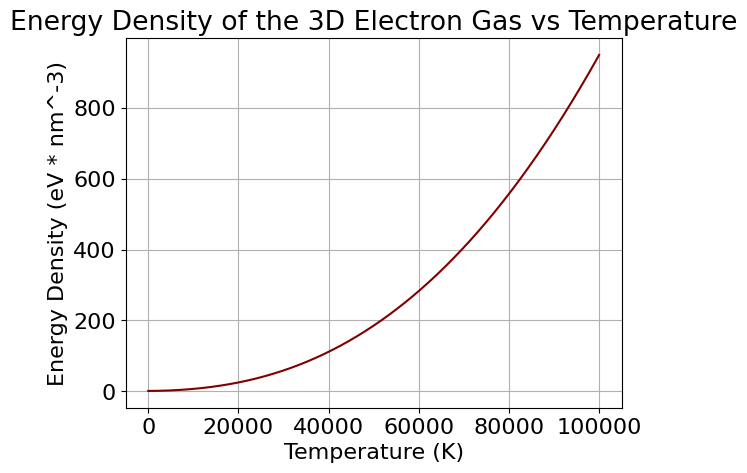

In [2]:
#Q1a)
#lengths in nanometres, masses in units of the electron mass, and energies in electronvolts

mu=1
me=1
hbar=0.276 #nm*root(eV*me)
k=8.62e-5 #eV/K
T_values=np.arange(0,10e4,10)
upperlim=float(np.inf)
EPS_values = []

for T in T_values:
  def f(w):
    return (np.exp((w-mu)/(k*T)) + 1)**-1
  def d(w):
    return ((me**(3/2))*np.sqrt(w) )/ (np.sqrt(2) * np.pi**2 * hbar**3)
  def dp(w):
    return d(w)*f(w) #as we see rho is same integrand without multiplying by w
  def de(w):
    return w*dp(w) #integrand
  result= integrate.quad(de, 0, np.inf)
  EPS_values.append(result[0])          #append list
EPS1 = np.array(EPS_values)  # Convert the list to a numpy array

plt.plot(T_values, EPS1, color='maroon', label='Using p of 1a')  # Plot with the updated arrays

plt.title('Energy Density of the 3D Electron Gas vs Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Energy Density (eV * nm^-3)')
plt.grid('True')
plt.show()

<ipython-input-3-74d63384d1e9>:15: RuntimeWarning: invalid value encountered in double_scalars
  return (np.exp((w-mu)/(k*T)) + 1)**-1
<ipython-input-3-74d63384d1e9>:15: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.exp((w-mu)/(k*T)) + 1)**-1
<ipython-input-3-74d63384d1e9>:22: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result1= integrate.quad(de, 0, np.inf)
<ipython-input-3-74d63384d1e9>:15: RuntimeWarning: overflow encountered in exp
  return (np.exp((w-mu)/(k*T)) + 1)**-1
<ipython-input-3-74d63384d1e9>:30: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result_2= integrate.quad(de, 0, np.inf)


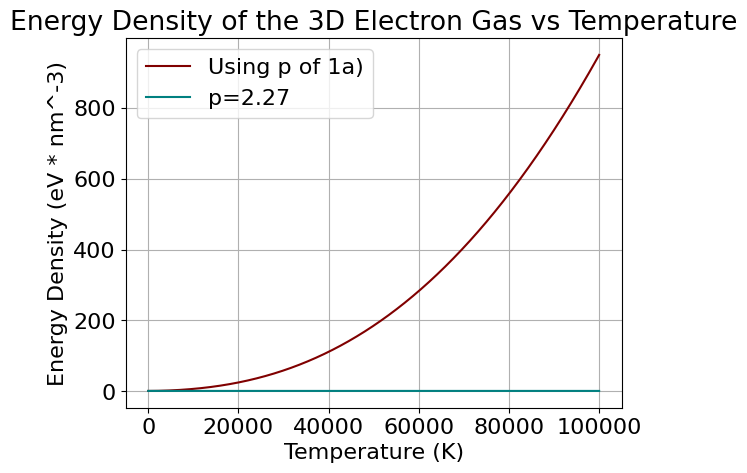

In [3]:
#1b)
#lengths in nanometres, masses in units of the electron mass, and energies in electronvolts

me=1
hbar=0.276 #nm*root(eV*me)
k=8.62e-5 #eV/K
T_values=np.arange(0,10e4,10)
p=2.27
upperlim=float(np.inf)
EPS1_values = []
EPS2_values = []                    #new list for second set of energy density values

for T in T_values:                  #loop from 1a
  def f(w):
    return (np.exp((w-mu)/(k*T)) + 1)**-1
  def d(w):
    return ((me**(3/2))*np.sqrt(w) )/ (np.sqrt(2) * np.pi**2 * hbar**3)
  def dp(w):
    return d(w)*f(w)
  def de(w):
    return w*dp(w)
  result1= integrate.quad(de, 0, np.inf)
  EPS1_values.append(result1[0])

for T in T_values:
   def p(w):
    return 2.7
   def de(w):
    return w*p(w)
   result_2= integrate.quad(de, 0, np.inf)
   EPS2_values.append(result_2[0])

EPS1 = np.array(EPS1_values)  # Convert the list to a numpy array
EPS2 = np.array(EPS2_values)

plt.plot(T_values, EPS1, color='maroon', label='Using p of 1a)')  # Plot with the updated arrays
plt.plot(T_values, EPS2, color='Teal', label='p=2.27')

plt.title('Energy Density of the 3D Electron Gas vs Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Energy Density (eV * nm^-3)')
plt.grid('True')
plt.legend()
plt.show()

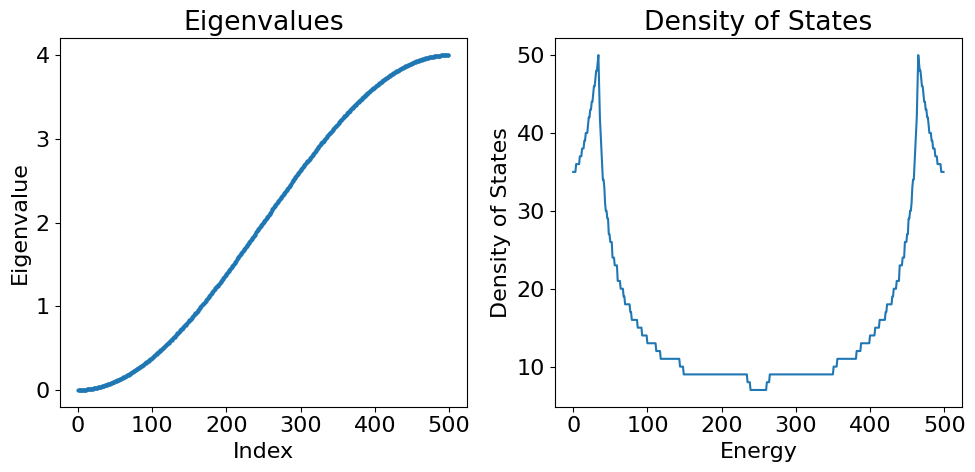

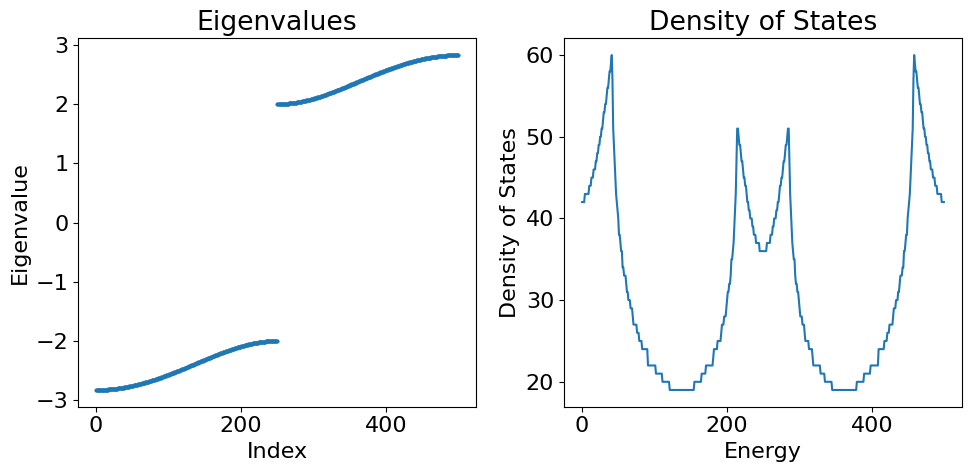

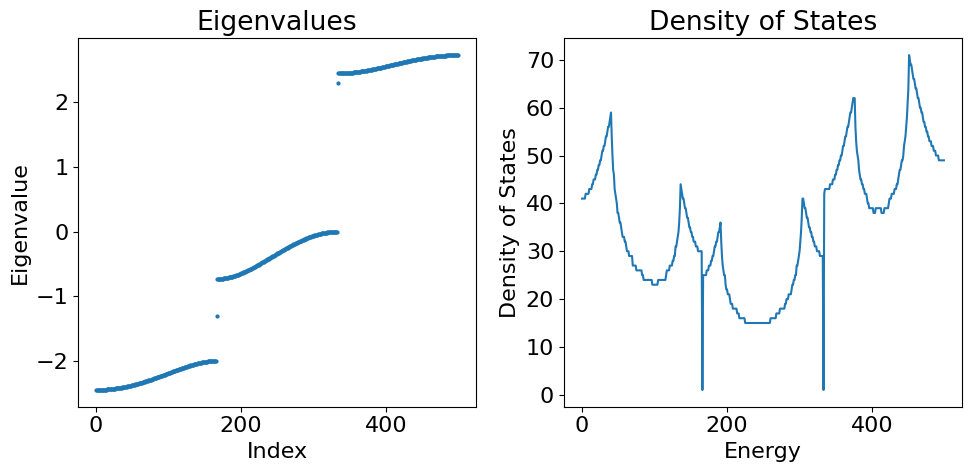

In [5]:
#2a)


def aah_model(alpha, L, u, h_bar, delta_w):          # Generate the Hamiltonian matrix
    H = np.zeros((L, L))
    for i in range(L):
        H[i, i] = u * np.cos(2 * np.pi * alpha * i)
        if i > 0:
            H[i, i-1] = -h_bar * lambda_
            H[i-1, i] = -h_bar * lambda_

    # Find eigenvalues
    eigenvalues = np.linalg.eigvalsh(H)

    # Sort eigenvalues
    eigenvalues.sort()

    # Calculate density of states
    dos = np.zeros(L)
    for i in range(L):
        dos[i] = np.count_nonzero(np.logical_and(eigenvalues >= eigenvalues[i] - delta_w/2, eigenvalues <= eigenvalues[i] + delta_w/2))

    # Plot eigenvalues and DOS
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(eigenvalues, 'o', markersize=2)
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues')

    plt.subplot(1, 2, 2)
    plt.plot(dos)
    plt.xlabel('Energy')
    plt.ylabel('Density of States')
    plt.title('Density of States')

    plt.tight_layout()
    plt.show()

# Parameters
h_bar = 1
lambda_ = 1
L = 500
u = 2 * h_bar * lambda_
delta_w = h_bar * lambda_ / 10

#alpha=1
alpha = 1
aah_model(alpha, L, u, h_bar, delta_w)

#alpha=1/2
alpha = 1/2
aah_model(alpha, L, u, h_bar, delta_w)

#alpha=1/3
alpha = 1/3
aah_model(alpha, L, u, h_bar, delta_w)


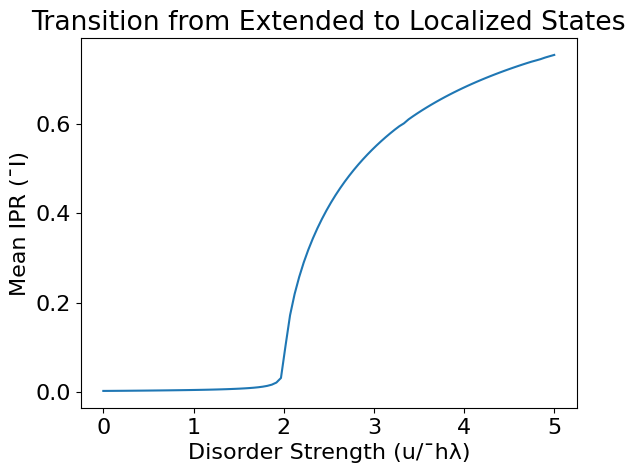

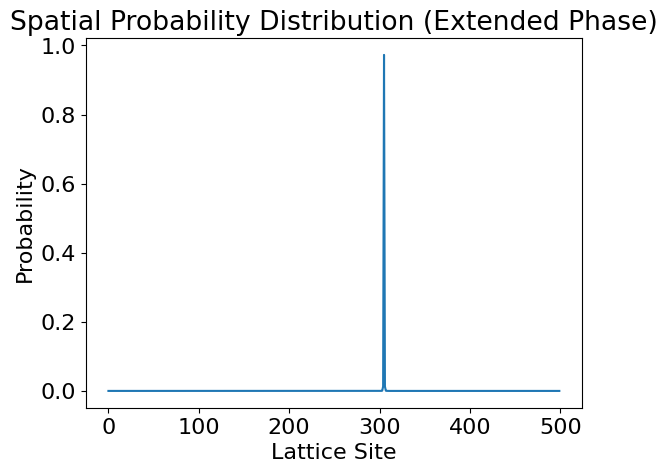

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

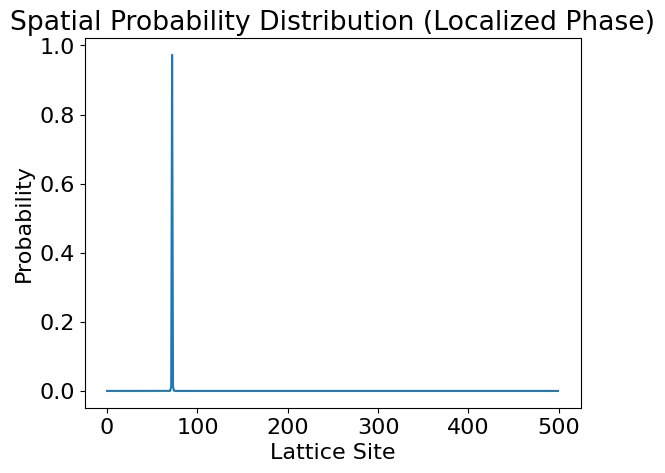

[2.61649953e-68 1.15605033e-67 2.09071181e-64 1.24530323e-62
 1.14647971e-60 7.06605992e-60 2.60967962e-58 4.86331766e-57
 3.80486872e-56 3.50529466e-54 8.70203900e-55 2.47262772e-53
 1.07062756e-51 6.27990234e-52 4.87815031e-50 2.44292407e-49
 4.16944272e-48 3.24796030e-46 4.98701149e-48 2.20915798e-48
 8.07982756e-48 1.10308372e-49 2.52692329e-47 5.36951555e-46
 1.57183941e-44 4.35063304e-43 7.78879607e-43 5.55130254e-41
 7.71073790e-40 8.59635080e-39 7.53823477e-37 6.14242391e-38
 1.21121006e-36 4.14751391e-35 5.07383603e-35 4.39672917e-33
 1.31169014e-32 2.86737453e-31 2.01148157e-29 3.50457488e-31
 9.38966128e-31 1.30231738e-29 6.88034708e-29 6.36363724e-27
 2.92216932e-27 8.81524962e-26 4.23742320e-24 1.36488465e-24
 9.28103136e-23 6.18104833e-22 8.89162382e-21 7.27060773e-19
 1.81159377e-20 8.26368330e-20 2.01994961e-18 4.65598087e-18
 4.25960094e-16 6.88117489e-16 1.81386032e-14 1.12370118e-12
 5.96150760e-14 1.63612975e-12 1.99999553e-11 1.64633130e-10
 1.48094004e-08 2.507712

In [6]:
#2b)

L = 500  #No. of lattice sites
u_values = np.linspace(0.0, 5.0, 100)  #disorder strength

mean_ipr_values = []
def generate_hamiltonian(u, L):
    alpha = (1 + np.sqrt(5)) / 2  #Golden ratio
    lambda_ = 1  #Tunnelling rate
    epsilon = u * np.cos(2 * np.pi * alpha * np.arange(L))  #On-site energy

    #Construct Hamiltonian matrix
    H = np.diag(epsilon) + lambda_ * np.diag(np.ones(L - 1), k=1) + lambda_ * np.diag(np.ones(L - 1), k=-1)

    return H

for u in u_values:
    H = generate_hamiltonian(u, L)  #Generate Hamiltonian for given disorder strength
    eigenvalues, eigenvectors = np.linalg.eigh(H)  #Compute eigen
    ipr_values = np.sum(np.abs(eigenvectors)**4, axis=1)  #IPR values for each eigenstate
    mean_ipr = np.mean(ipr_values)  #Mean IPR
    mean_ipr_values.append(mean_ipr)

#Plot mean IPR as funct. of u
plt.plot(u_values, mean_ipr_values)
plt.xlabel('Disorder Strength (u/¯hλ)')
plt.ylabel('Mean IPR (¯I)')
plt.title('Transition from Extended to Localized States')
plt.show()

#Plotting eigenstate in extended
extended_state_index = 0  #Index of eigenstate in the extended
extended_state_prob = np.abs(eigenvectors[:, extended_state_index])**2
plt.plot(range(L), extended_state_prob)
plt.xlabel('Lattice Site')
plt.ylabel('Probability')
plt.title('Spatial Probability Distribution (Extended Phase)')
plt.show()
print(extended_state_prob)

#Plotting eigenstate in localized
localized_state_index = 1  #Index of eigenstate in localized
localized_state_prob = np.abs(eigenvectors[:, localized_state_index])**2
plt.plot(range(L), localized_state_prob)
plt.xlabel('Lattice Site')
plt.ylabel('Probability')
plt.title('Spatial Probability Distribution (Localized Phase)')
plt.show()
print(localized_state_prob)


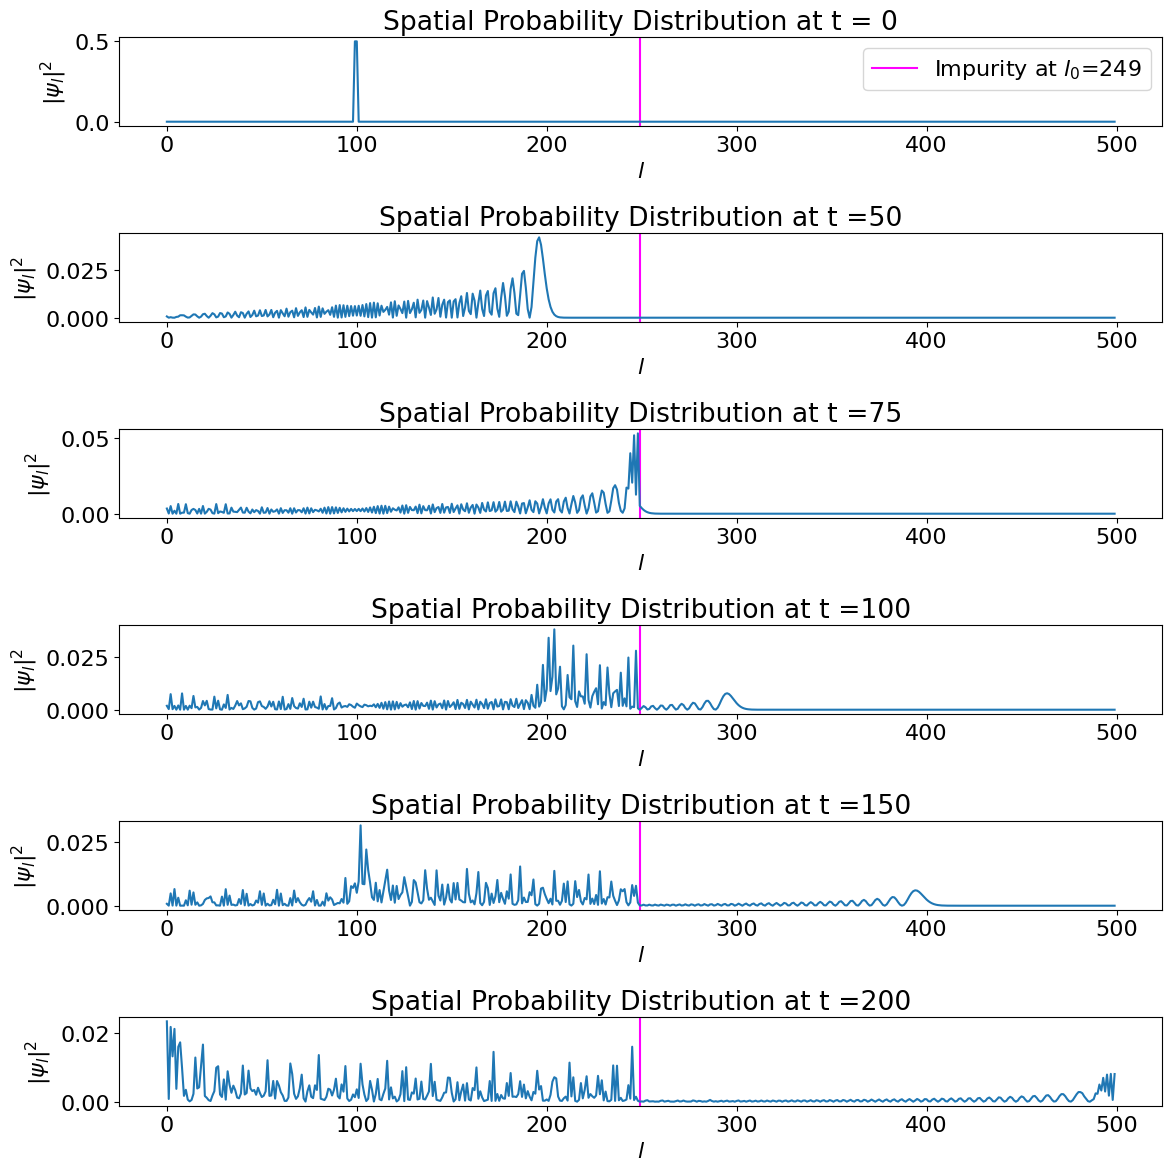

In [7]:
#Q3)

# Define parameters
L = 500  # Number of sites
lambda_ = 1  # Tunneling rate
u = 2  # On-site energy
v = 5  # On-site energy at l = l0
l0 = 249  # Impurity site

# Construct Hamiltonian
H = np.zeros((L, L), dtype=complex)
for l in range(L):
    for m in range(L):
        if l == m:
            if l == l0:
                H[l, m] = v
            else:
                H[l, m] = u
        elif abs(l - m) == 1:
            H[l, m] = -lambda_

# Define initial state
psi_0 = np.zeros(L, dtype=complex)
psi_0[99] = 1 / np.sqrt(2)
psi_0[100] = 1j / np.sqrt(2)

#diff eqn & its plot
fig, graph = plt.subplots(6, 1, figsize=(12, 12))
graph[0].axvline(x=l0, color='magenta',label='Impurity at $l_0$=249')
graph[1].axvline(x=l0, color='magenta')
graph[2].axvline(x=l0, color='magenta')
graph[3].axvline(x=l0, color='magenta')
graph[4].axvline(x=l0, color='magenta')
graph[5].axvline(x=l0, color='magenta')
graph[0].plot(np.abs(psi_0) ** 2)
graph[0].set(title='Spatial Probability Distribution at t = 0', ylabel='$|\psi_l|^2$', xlabel='$l$')
graph[0].legend()
times = [50,75,100, 150, 200]
for time in range(len(times)):
    time_f = times[time]
    sol = integrate.solve_ivp(lambda t, y: -1j * H @ y, (0.0, time_f), psi_0)
    graph[time + 1].plot(np.abs(sol.y[:, -1]) ** 2)
    graph[time + 1].set(title='Spatial Probability Distribution at t =' + str(time_f), ylabel='$|\psi_l|^2$', xlabel='$l$')
fig.tight_layout()
plt.show()